<a href="https://colab.research.google.com/github/Amrshour/Car-/blob/main/Car%F0%9F%8F%8E%F0%9F%9A%A6%E2%9B%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code

Cloning into 'mlbookcamp-code'...
remote: Enumerating objects: 4489, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 4489 (delta 45), reused 33 (delta 33), pack-reused 4434 (from 1)
Receiving objects: 100% (4489/4489), 9.03 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (2720/2720), done.


In [ ]:
df = pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')

In [ ]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [ ]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


# EDA

In [ ]:
pd.options.display.float_format = '{: ,.2f}'.format
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [ ]:
df.describe(include=['O'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


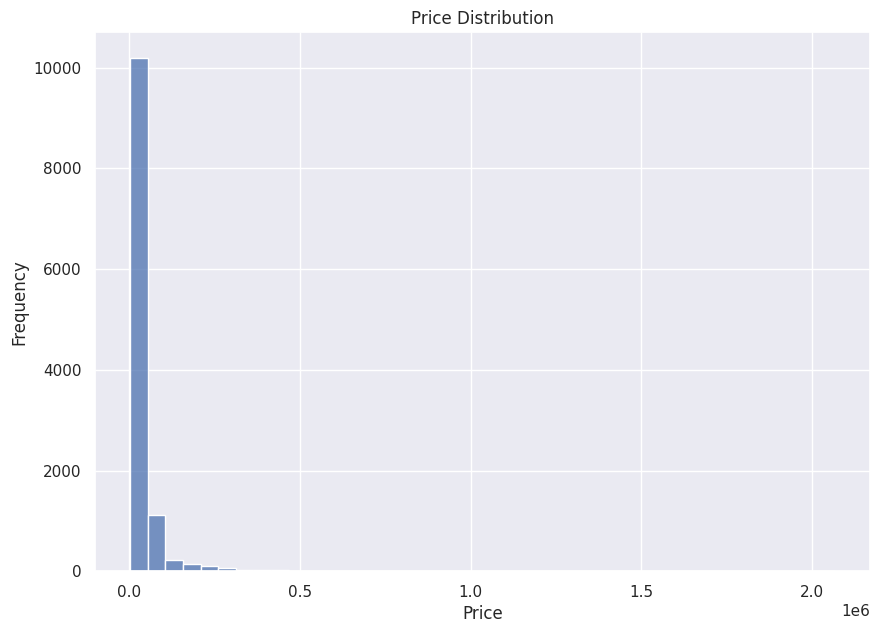

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(df.price,bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

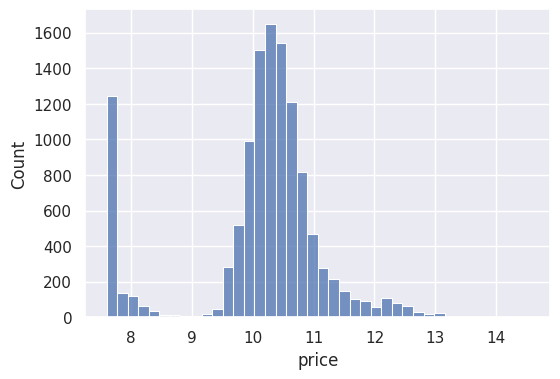

In [ ]:
df['price'] = np.log1p(df.price)
plt.figure(figsize=(6, 4))
sns.histplot(df.price, bins=40)
plt.show()

In [ ]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(7))
    print('\n' + '*' * 20 + '\n')

make : 48
make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Nissan         558
GMC            515
Name: count, dtype: int64

********************

model : 915
model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Tacoma                 80
Frontier               76
Name: count, dtype: int64

********************

year : 28
year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
2009     379
2013     366
Name: count, dtype: int64

********************

engine_fuel_type : 10
engine_fuel_type
regular unleaded                             7172
premium unleaded (required)                  2009
premium unleaded (recommended)               1523
flex-fuel (unleaded/E85)                      899
diesel                                        154
electric                                       66
flex-fuel (premium unleaded required/E85)      54
Name: coun

#  **Fill Null**

**From the dataset we noticed the price depend on those columns the most:**

* make

* model

* year

* engine_hp

* engine_cylinders

* transmission_type

* vehicle_size

* price



In [ ]:
print(df.isnull().sum())

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
dtype: int64


In [ ]:
df['engine_hp']=df['engine_hp'].fillna(df['engine_hp'].mean())
df['engine_cylinders']=df['engine_cylinders'].fillna(df['engine_cylinders'].mean())

In [ ]:
df = df.drop(['transmission_type','driven_wheels', 'number_of_doors', 'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity','engine_fuel_type','market_category'], axis=1)
print(df.columns)

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'vehicle_size', 'price'],
      dtype='object')


In [ ]:
X = df.drop(['price'], axis=1)
X.head(1)

,make,model,year,engine_hp,engine_cylinders,vehicle_size
0,BMW,1 Series M,2011,335.00,6.00,Compact


# **Encoding using dummies**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              11914 non-null  object 
 1   model             11914 non-null  object 
 2   year              11914 non-null  int64  
 3   engine_hp         11914 non-null  float64
 4   engine_cylinders  11914 non-null  float64
 5   vehicle_size      11914 non-null  object 
 6   price             11914 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 651.7+ KB


In [ ]:
df = pd.get_dummies(df, columns= ['make', 'model'], drop_first=True)

# **Trial and Error🚨🚧⚠️**

In [ ]:
df['vehicle_size'] = df['vehicle_size'].replace({'Compact': 0, 'Midsize': 1, 'Large':2})

/tmp/ipython-input-3331186467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['vehicle_size'] = df['vehicle_size'].replace({'Compact': 0, 'Midsize': 1, 'Large':2})


In [ ]:
df.shape

(11914, 966)

In [ ]:
X = df.drop(['price'], axis=1)
X.head(1)

,year,engine_hp,engine_cylinders,vehicle_size,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,...,model_e-Golf,model_i-MiEV,model_i3,model_iA,model_iM,model_iQ,model_tC,model_xA,model_xB,model_xD
0,2011,335.00,6.00,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Y = df['price']
print(Y.head())

0    10.74
1    10.61
2    10.50
3    10.29
4    10.45
Name: price, dtype: float64


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Trainig:  Usig Linear **Regrssion**

In [ ]:
Model = LinearRegression()


In [ ]:
Model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred_train = Model.predict(X_train)
mse_train = mean_squared_error(Y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, y_pred_train)

print(f"RMSE (Root Mean Squared Error) on training data: {rmse_train}")
print(f"R^2 Score on training data: {r2_train}")

RMSE (Root Mean Squared Error) on training data: 0.17452375622379795
R^2 Score on training data: 0.9748657735018844


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
pred_train = model.predict(X_train)
mse_train_dt = mean_squared_error(Y_train, pred_train)
rmse_train_dt = np.sqrt(mse_train_dt)
r2_train_dt = r2_score(Y_train, pred_train)

print(f"RMSE (Root Mean Squared Error) on training data: {rmse_train_dt}")
print(f"R^2 Score on training data: {r2_train_dt}")

RMSE (Root Mean Squared Error) on training data: 0.07544156564557238
R^2 Score on training data: 0.9953034623658881


#**Predict test**

In [ ]:
pred_test = model.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(Y_test, pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, pred_test)

print(f"RMSE (Root Mean Squared Error) for Decision Tree: {rmse_test}")
print(f"R^2 Score for Decision Tree: {r2_test}")

RMSE (Root Mean Squared Error) for Decision Tree: 0.1083812413477266
R^2 Score for Decision Tree: 0.990710559553393
